# 여러 CNN 모델을 사용한 이미지 분류

In [1]:
import numpy as np
import cv2, time, os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!unzip animals.zip -d animals

Archive:  animals.zip
  inflating: animals/camel.jpg       
  inflating: animals/cat.jpg         
  inflating: animals/cheetah.jpg     
  inflating: animals/crocodile.jpg   
  inflating: animals/dog.jpg         
  inflating: animals/elephant.jpg    
  inflating: animals/fox.jpg         
  inflating: animals/giraffe.jpg     
  inflating: animals/hedgehog.jpg    
  inflating: animals/hippo.jpg       
  inflating: animals/horse.jpg       
  inflating: animals/koala.jpg       
  inflating: animals/lion.jpg        
  inflating: animals/orangutan.jpg   
  inflating: animals/pig.jpg         
  inflating: animals/rabbit.jpg      
  inflating: animals/snake.jpg       
  inflating: animals/squirrel.jpg    
  inflating: animals/tiger.jpg       
  inflating: animals/tuttle.jpg      


In [3]:
path_dir = '/content/animals'
file_list = os.listdir(path_dir)
len(file_list), file_list

(20,
 ['tuttle.jpg',
  'lion.jpg',
  'elephant.jpg',
  'orangutan.jpg',
  'hippo.jpg',
  'koala.jpg',
  'horse.jpg',
  'snake.jpg',
  'dog.jpg',
  'hedgehog.jpg',
  'giraffe.jpg',
  'crocodile.jpg',
  'rabbit.jpg',
  'cheetah.jpg',
  'camel.jpg',
  'squirrel.jpg',
  'cat.jpg',
  'tiger.jpg',
  'fox.jpg',
  'pig.jpg'])

In [4]:
def img_generator(filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    img = img[:,:,::-1]
    plt.imshow(img)
    plt.axis("off")
    plt.show()

### 1. VGGNet16

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [6]:
vgg16 = VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [7]:
def acc_vgg16(filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    yhat = vgg16.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    label = label[0][0]

    result = label[1]
    acc = round(label[2]*100, 2)

    print(f'{result} ({acc}%)')

40960/35363 [==================================] - 0s 0us/step
Egyptian_cat (61.16%)
테스트 시 소요 시간 : 1.12 [sec]


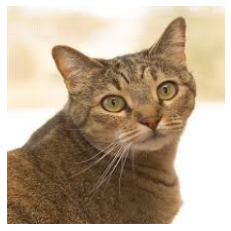

In [8]:
start = time.time()
acc_vgg16('cat.jpg')
end = time.time() - start
print(f'테스트 시 소요 시간 : {end:.2f} [sec]')
img_generator('cat.jpg')

### 2. VGG19

In [9]:
from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions

In [10]:
vgg19 = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [11]:
def acc_vgg19(filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    yhat = vgg19.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    label = label[0][0]

    result = label[1]
    acc = round(label[2]*100, 2)

    print(f'{result} ({acc}%)')

tabby (52.16%)
테스트 시 소요 시간 : 0.92 [sec]


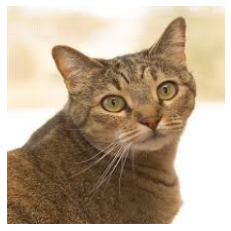

In [12]:
start = time.time()
acc_vgg19('cat.jpg')
end = time.time() - start
print(f'테스트 시 소요 시간 : {end:.2f} [sec]')
img_generator('cat.jpg')

### 3. ResNet50

In [13]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [14]:
res50 = ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [15]:
def acc_res50(filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    yhat = res50.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    label = label[0][0]

    result = label[1]
    acc = round(label[2]*100, 2)

    print(f'{result} ({acc}%)')

tabby (48.12%)
테스트 시 소요 시간 : 1.11 [sec]


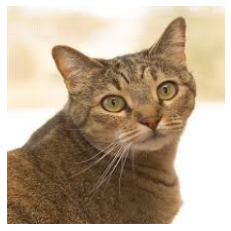

In [16]:
start = time.time()
acc_res50('cat.jpg')
end = time.time() - start
print(f'테스트 시 소요 시간 : {end:.2f} [sec]')
img_generator('cat.jpg')

### 4. ResNet101

In [17]:
from tensorflow.keras.applications.resnet import ResNet101, decode_predictions

In [18]:
res101 = ResNet101()

179650560/179648224 [==============================] - 1s 0us/step


In [19]:
def acc_res101(filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    yhat = res101.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    label = label[0][0]

    result = label[1]
    acc = round(label[2]*100, 2)

    print(f'{result} ({acc}%)')

tabby (68.4%)
테스트 시 소요 시간 : 2.17 [sec]


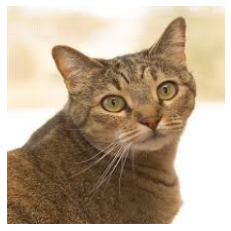

In [20]:
start = time.time()
acc_res101('cat.jpg')
end = time.time() - start
print(f'테스트 시 소요 시간 : {end:.2f} [sec]')
img_generator('cat.jpg')

### Application별 결과값 데이터프레임으로 나타내기

In [21]:
import pandas as pd

In [23]:
def get_result(application, filename):
    img = cv2.imread(f'animals/{filename}', -1)
    img = cv2.resize(img, (224, 224))

    app = application
    yhat = app.predict(img.reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    label = label[0][0]

    result = label[1]
    acc = round(label[2]*100, 2)

    return f'{result} ({acc}%)'

In [24]:
res = get_result(VGG16(), 'cat.jpg')
res

'Egyptian_cat (61.16%)'

In [30]:
from tqdm.auto import tqdm

In [31]:
org_list = []
vgg16_list = []; vgg19_list = []
res50_list = []; res101_list = []
app_list = [vgg16, vgg19, res50, res101]

for app in tqdm(app_list):
    for file_name in file_list:
        if app == vgg16:
            result = get_result(app, file_name)
            vgg16_list.append(result)
        elif app == vgg19:
            result = get_result(app, file_name)
            vgg19_list.append(result)
        elif app == res50:
            result = get_result(app, file_name)
            res50_list.append(result)
        else:
            result = get_result(app, file_name)
            res101_list.append(result)

In [33]:
file_list

['tuttle.jpg',
 'lion.jpg',
 'elephant.jpg',
 'orangutan.jpg',
 'hippo.jpg',
 'koala.jpg',
 'horse.jpg',
 'snake.jpg',
 'dog.jpg',
 'hedgehog.jpg',
 'giraffe.jpg',
 'crocodile.jpg',
 'rabbit.jpg',
 'cheetah.jpg',
 'camel.jpg',
 'squirrel.jpg',
 'cat.jpg',
 'tiger.jpg',
 'fox.jpg',
 'pig.jpg']

In [32]:
vgg16_list

['loggerhead (85.23%)',
 'lion (100.0%)',
 'Indian_elephant (33.62%)',
 'orangutan (99.8%)',
 'hippopotamus (34.79%)',
 'koala (91.27%)',
 'sorrel (89.72%)',
 'rock_python (19.88%)',
 'golden_retriever (79.41%)',
 'porcupine (99.94%)',
 'hartebeest (54.29%)',
 'American_alligator (34.35%)',
 'hare (89.35%)',
 'cheetah (99.64%)',
 'Arabian_camel (99.44%)',
 'bittern (32.1%)',
 'Egyptian_cat (61.16%)',
 'tiger (80.99%)',
 'red_fox (84.84%)',
 'hog (99.99%)']

In [34]:
res50_list

['leatherback_turtle (79.52%)',
 'lion (99.94%)',
 'Indian_elephant (87.94%)',
 'orangutan (98.89%)',
 'hippopotamus (99.67%)',
 'koala (87.98%)',
 'sorrel (98.27%)',
 'rock_python (37.3%)',
 'golden_retriever (44.67%)',
 'porcupine (90.46%)',
 'hyena (55.11%)',
 'American_alligator (98.0%)',
 'wood_rabbit (68.97%)',
 'cheetah (99.72%)',
 'Arabian_camel (100.0%)',
 'fox_squirrel (98.63%)',
 'tabby (48.12%)',
 'tiger (97.62%)',
 'red_fox (94.54%)',
 'hog (99.93%)']

In [35]:
raw_data = {
    '원본 이미지': file_list,
    'VGG16': vgg16_list,
    'VGG19': vgg19_list,
    'ResNet50': res50_list,
    'ResNet101': res101_list
}

df = pd.DataFrame(raw_data)
df

,원본 이미지,VGG16,VGG19,ResNet50,ResNet101
0,tuttle.jpg,loggerhead (85.23%),loggerhead (96.23%),leatherback_turtle (79.52%),leatherback_turtle (73.1%)
1,lion.jpg,lion (100.0%),lion (100.0%),lion (99.94%),lion (99.34%)
2,elephant.jpg,Indian_elephant (33.62%),Indian_elephant (51.37%),Indian_elephant (87.94%),Indian_elephant (90.88%)
3,orangutan.jpg,orangutan (99.8%),orangutan (99.85%),orangutan (98.89%),orangutan (98.99%)
4,hippo.jpg,hippopotamus (34.79%),hippopotamus (76.0%),hippopotamus (99.67%),hippopotamus (97.3%)
5,koala.jpg,koala (91.27%),koala (48.39%),koala (87.98%),koala (60.71%)
6,horse.jpg,sorrel (89.72%),sorrel (98.2%),sorrel (98.27%),sorrel (92.65%)
7,snake.jpg,rock_python (19.88%),seashore (9.24%),rock_python (37.3%),grey_whale (11.98%)
8,dog.jpg,golden_retriever (79.41%),Leonberg (70.24%),golden_retriever (44.67%),Leonberg (69.96%)
9,hedgehog.jpg,porcupine (99.94%),porcupine (99.6%),porcupine (90.46%),porcupine (99.9%)
